In [1]:
import pandas as pd

In [2]:
# Read a dataset with missing values (download zipped dataset from here)
df = pd.read_csv('http://www.cs.ucy.ac.cy/courses/DSC510/data/synthetic_dataset.csv', parse_dates=['Join_Date'])
df.head()

,ID,Name,Age,Degree,Score,Salary,Hours,Error_Rate,Satisfaction,Join_Date,Sales
0,1,Aaron,24.0,Master,79.0,93297.0,51.7,NaN,0.64,2023-07-22 08:43:44,3385.0
1,2,Caroline,41.0,Bachelor,55.0,26012.0,47.1,NaN,0.61,2023-11-10 22:30:09,1982.0
2,3,Briana,30.0,Bachelor,50.0,56059.0,NaN,NaN,0.61,2023-06-14 13:30:15,1014.0
3,4,Michael,49.0,Master,51.0,88910.0,46.2,NaN,0.58,2022-12-18 15:31:34,2696.0
4,5,Andrew,58.0,PhD,73.0,72290.0,42.3,NaN,0.64,2024-04-05 03:26:19,667.0


In [3]:
df.dtypes

ID                       int64
Name                    object
Age                    float64
Degree                  object
Score                  float64
Salary                 float64
Hours                  float64
Error_Rate             float64
Satisfaction           float64
Join_Date       datetime64[ns]
Sales                  float64
dtype: object

In [4]:
# isnull() converts missing values to True, False otherwise; sum() works on Boolean values, treating True=1 and False=0, counts 1s
missing_values_count = df.isnull().sum()

# look at the # of missing points for each column
missing_values_count

ID                0
Name              0
Age              37
Degree            0
Score            25
Salary           21
Hours            15
Error_Rate      396
Satisfaction     22
Join_Date        26
Sales             0
dtype: int64

In [5]:
# percentage of missing values
missing_values_percentage = df.isnull().mean() * 100

# look at the # of missing points for each column
missing_values_percentage

ID               0.0
Name             0.0
Age              7.4
Degree           0.0
Score            5.0
Salary           4.2
Hours            3.0
Error_Rate      79.2
Satisfaction     4.4
Join_Date        5.2
Sales            0.0
dtype: float64

In [6]:
df = df.drop(columns=['ID', 'Error_Rate'])

In [7]:
# remove all columns with at least one missing value
columns_cleaned = df.dropna(axis=1)
columns_cleaned.head()

,Name,Degree,Sales
0,Aaron,Master,3385.0
1,Caroline,Bachelor,1982.0
2,Briana,Bachelor,1014.0
3,Michael,Master,2696.0
4,Andrew,PhD,667.0


In [8]:
# just how much data did we lose?
print("Columns in original dataset:", df.shape[1])
print("Columns with na's dropped:", columns_cleaned.shape[1])

Columns in original dataset: 9
Columns with na's dropped: 3


In [9]:
# replace all NA's with 0 (save in a new dataframe)
df_zero = df.fillna(0)
# replace all NA's with 0 for a specific column (replace column)
df['Age'] = df['Age'].fillna(0)

In [10]:
# replace all NA's the first valid value that comes after it in the same column, then replace all the remaining na’s (if any) with 0
df = df.bfill(axis=0).fillna(0)

In [11]:
# features (DataFrame)
X = df.drop(columns=['Sales'])
# target (Series)
y = df['Sales']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [13]:
# Using Sklearn’s simple imputer
from sklearn.impute import SimpleImputer
import numpy as np
my_imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

In [14]:
X_train[['Age']] = my_imputer.fit_transform(X_train[['Age']])
X_test[['Age']] = my_imputer.transform(X_test[['Age']])

#### Encoding categorical data

In [15]:
import category_encoders as ce

In [16]:
X_train[['Degree']].value_counts()

Degree     
Master         108
Bachelor       102
High School     99
PhD             91
Name: count, dtype: int64

In [17]:
ordinal_encoder = ce.OrdinalEncoder( mapping=[{'col':'Degree','mapping':{'None':0,'High School':1,'Bachelor':2,'Master':3,'PhD':4}}])

#fit and transform training data
X_train['Degree_Ordinal'] = ordinal_encoder.fit_transform(X_train['Degree'])
X_test['Degree_Ordinal'] = ordinal_encoder.transform(X_test['Degree'])
X_train[['Degree', 'Degree_Ordinal']].head()

,Degree,Degree_Ordinal
249,High School,1
433,PhD,4
19,Master,3
322,Bachelor,2
332,High School,1


In [18]:
# Create object for One-hot encoding
onehot_encoder=ce.OneHotEncoder(cols=['Degree'], use_cat_names=True)

In [19]:
#fit and transform training data
X_train_onehot = onehot_encoder.fit_transform(X_train)
X_train_onehot.head()

,Name,Age,Degree_High School,Degree_PhD,Degree_Master,Degree_Bachelor,Score,Salary,Hours,Satisfaction,Join_Date,Degree_Ordinal
249,Wanda,52.0,1,0,0,0,96.0,80576.0,47.1,0.89,2025-05-14 23:58:54,1
433,James,25.0,0,1,0,0,60.0,34716.0,32.4,0.75,2024-02-02 21:10:37,4
19,Christopher,25.0,0,0,1,0,88.0,76532.0,47.3,0.83,2025-05-07 23:32:30,3
322,Robert,39.0,0,0,0,1,74.0,72290.0,51.7,0.98,2023-03-12 10:19:35,2
332,Edward,43.0,1,0,0,0,51.0,37347.0,55.7,0.57,2022-11-17 17:43:21,1


In [20]:
from datetime import datetime
from math import sin, cos, pi

days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

def sin_cos(n):
    theta = 2 * pi * n
    return (sin(theta), cos(theta))

def get_cycle(d, x):
    '''
    Get the cyclic properties of a datetime,
    represented as points on the unit circle.
    Arguments
    ---------
    d : datetime object
    Returns
    -------
    dictionary of sine and cosine tuples
    '''

    month = d.month - 1
    day = d.day - 1
    if x == 'month':
        return sin_cos(month / 12)
    elif x == 'day':
        return sin_cos(day / days_in_month[month])
    elif x == 'weekday':
        return sin_cos(d.weekday() / 7)
    elif x == 'hour':
        return sin_cos(d.hour / 24)
    elif x == 'minute':
        return sin_cos(d.minute / 60)
    elif x == 'second':
        return sin_cos(d.second / 60)

In [21]:
X_train[['hour_sin', 'hour_cos']] = X_train['Join_Date'].map(lambda i: get_cycle(i, 'hour')).apply(pd.Series)
X_train

,Name,Age,Degree,Score,Salary,Hours,Satisfaction,Join_Date,Degree_Ordinal,hour_sin,hour_cos
249,Wanda,52.0,High School,96.0,80576.0,47.1,0.89,2025-05-14 23:58:54,1,-2.588190e-01,0.965926
433,James,25.0,PhD,60.0,34716.0,32.4,0.75,2024-02-02 21:10:37,4,-7.071068e-01,0.707107
19,Christopher,25.0,Master,88.0,76532.0,47.3,0.83,2025-05-07 23:32:30,3,-2.588190e-01,0.965926
322,Robert,39.0,Bachelor,74.0,72290.0,51.7,0.98,2023-03-12 10:19:35,2,5.000000e-01,-0.866025
332,Edward,43.0,High School,51.0,37347.0,55.7,0.57,2022-11-17 17:43:21,1,-9.659258e-01,-0.258819
...,...,...,...,...,...,...,...,...,...,...,...
106,Stacey,54.0,Master,95.0,85481.0,30.0,0.88,2024-01-01 20:41:33,3,-8.660254e-01,0.500000
270,Steven,0.0,Bachelor,50.0,87203.0,44.5,1.00,2023-05-19 05:17:41,2,9.659258e-01,0.258819
348,Casey,22.0,Master,59.0,81929.0,51.6,0.74,2024-09-03 23:19:50,3,-2.588190e-01,0.965926
435,Daniel,46.0,Master,64.0,114397.0,35.2,0.90,2025-02-03 09:10:13,3,7.071068e-01,-0.707107


<Axes: xlabel='hour_sin', ylabel='hour_cos'>

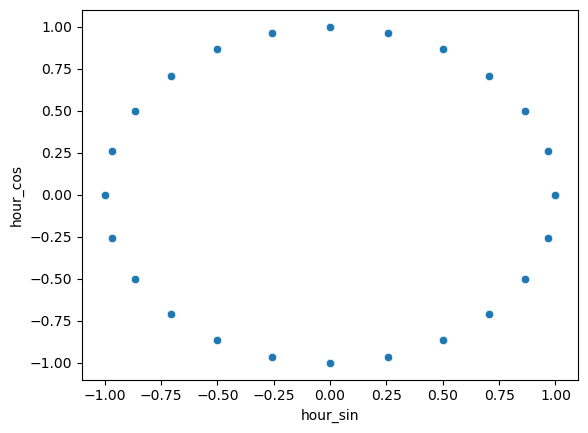

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.scatterplot(data=X_train, x='hour_sin', y='hour_cos')

#### Scaling data

In [23]:
from sklearn.preprocessing import MinMaxScaler
# create the scaler object
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = X_train.copy()
columns_to_scale = ['Age', 'Score', 'Hours']
# train the scaler (find min and max) on the training dataset
scaler.fit(X_train[columns_to_scale])
# scale the dataset (apply the transformation)
X_train_scaled[columns_to_scale] = scaler.transform(X_train[columns_to_scale])
X_train_scaled

,Name,Age,Degree,Score,Salary,Hours,Satisfaction,Join_Date,Degree_Ordinal,hour_sin,hour_cos
249,Wanda,0.881356,High School,0.938776,80576.0,0.571906,0.89,2025-05-14 23:58:54,1,-2.588190e-01,0.965926
433,James,0.423729,PhD,0.204082,34716.0,0.080268,0.75,2024-02-02 21:10:37,4,-7.071068e-01,0.707107
19,Christopher,0.423729,Master,0.775510,76532.0,0.578595,0.83,2025-05-07 23:32:30,3,-2.588190e-01,0.965926
322,Robert,0.661017,Bachelor,0.489796,72290.0,0.725753,0.98,2023-03-12 10:19:35,2,5.000000e-01,-0.866025
332,Edward,0.728814,High School,0.020408,37347.0,0.859532,0.57,2022-11-17 17:43:21,1,-9.659258e-01,-0.258819
...,...,...,...,...,...,...,...,...,...,...,...
106,Stacey,0.915254,Master,0.918367,85481.0,0.000000,0.88,2024-01-01 20:41:33,3,-8.660254e-01,0.500000
270,Steven,0.000000,Bachelor,0.000000,87203.0,0.484950,1.00,2023-05-19 05:17:41,2,9.659258e-01,0.258819
348,Casey,0.372881,Master,0.183673,81929.0,0.722408,0.74,2024-09-03 23:19:50,3,-2.588190e-01,0.965926
435,Daniel,0.779661,Master,0.285714,114397.0,0.173913,0.90,2025-02-03 09:10:13,3,7.071068e-01,-0.707107


In [24]:
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [25]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
X_train_standard_scaled = X_train.copy()
X_test_standard_scaled = X_test.copy()
# train the standardizer (find mean, std) and standardize the dataset
X_train_standard_scaled[columns_to_scale] = sscaler.fit_transform(X_train[columns_to_scale])
X_test_standard_scaled[columns_to_scale] = sscaler.transform(X_test[columns_to_scale])

X_train_standard_scaled

,Name,Age,Degree,Score,Salary,Hours,Satisfaction,Join_Date,Degree_Ordinal,hour_sin,hour_cos
249,Wanda,0.888411,High School,1.515563,80576.0,0.204002,0.89,2025-05-14 23:58:54,1,-2.588190e-01,0.965926
433,James,-0.853571,PhD,-1.079764,34716.0,-1.569407,0.75,2024-02-02 21:10:37,4,-7.071068e-01,0.707107
19,Christopher,-0.853571,Master,0.938823,76532.0,0.228130,0.83,2025-05-07 23:32:30,3,-2.588190e-01,0.965926
322,Robert,0.049679,Bachelor,-0.070470,72290.0,0.758947,0.98,2023-03-12 10:19:35,2,5.000000e-01,-0.866025
332,Edward,0.307750,High School,-1.728596,37347.0,1.241507,0.57,2022-11-17 17:43:21,1,-9.659258e-01,-0.258819
...,...,...,...,...,...,...,...,...,...,...,...
106,Stacey,1.017447,Master,1.443470,85481.0,-1.858943,0.88,2024-01-01 20:41:33,3,-8.660254e-01,0.500000
270,Steven,-2.466518,Bachelor,-1.800688,87203.0,-0.109662,1.00,2023-05-19 05:17:41,2,9.659258e-01,0.258819
348,Casey,-1.047125,Master,-1.151857,81929.0,0.746883,0.74,2024-09-03 23:19:50,3,-2.588190e-01,0.965926
435,Daniel,0.501304,Master,-0.791394,114397.0,-1.231614,0.90,2025-02-03 09:10:13,3,7.071068e-01,-0.707107


In [26]:
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()

X_train_robust_scaled = X_train.copy()
X_test_robust_scaled = X_test.copy()
# train the standardizer (find mean, std) and standardize the dataset
X_train_robust_scaled[columns_to_scale] = rscaler.fit_transform(X_train[columns_to_scale])
X_test_robust_scaled[columns_to_scale] = rscaler.transform(X_test[columns_to_scale])

X_train_robust_scaled

,Name,Age,Degree,Score,Salary,Hours,Satisfaction,Join_Date,Degree_Ordinal,hour_sin,hour_cos
249,Wanda,0.545455,High School,0.903226,80576.0,0.133333,0.89,2025-05-14 23:58:54,1,-2.588190e-01,0.965926
433,James,-0.681818,PhD,-0.645161,34716.0,-0.986667,0.75,2024-02-02 21:10:37,4,-7.071068e-01,0.707107
19,Christopher,-0.681818,Master,0.559140,76532.0,0.148571,0.83,2025-05-07 23:32:30,3,-2.588190e-01,0.965926
322,Robert,-0.045455,Bachelor,-0.043011,72290.0,0.483810,0.98,2023-03-12 10:19:35,2,5.000000e-01,-0.866025
332,Edward,0.136364,High School,-1.032258,37347.0,0.788571,0.57,2022-11-17 17:43:21,1,-9.659258e-01,-0.258819
...,...,...,...,...,...,...,...,...,...,...,...
106,Stacey,0.636364,Master,0.860215,85481.0,-1.169524,0.88,2024-01-01 20:41:33,3,-8.660254e-01,0.500000
270,Steven,-1.818182,Bachelor,-1.075269,87203.0,-0.064762,1.00,2023-05-19 05:17:41,2,9.659258e-01,0.258819
348,Casey,-0.818182,Master,-0.688172,81929.0,0.476190,0.74,2024-09-03 23:19:50,3,-2.588190e-01,0.965926
435,Daniel,0.272727,Master,-0.473118,114397.0,-0.773333,0.90,2025-02-03 09:10:13,3,7.071068e-01,-0.707107


#### Unskewing transformations

1.8630503520356725

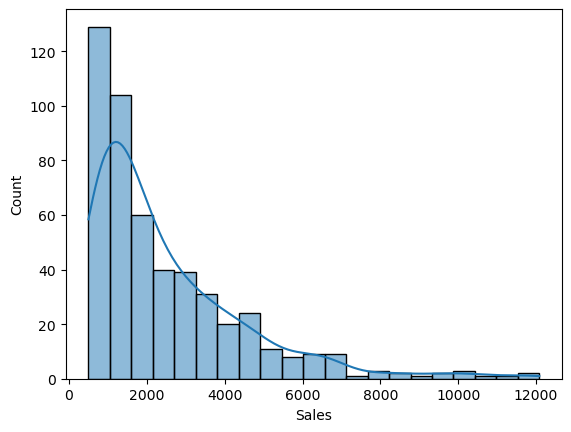

In [27]:
fig,ax = plt.subplots()
sns.histplot(data=y, kde=True)
y.skew()

1.8159706431969649

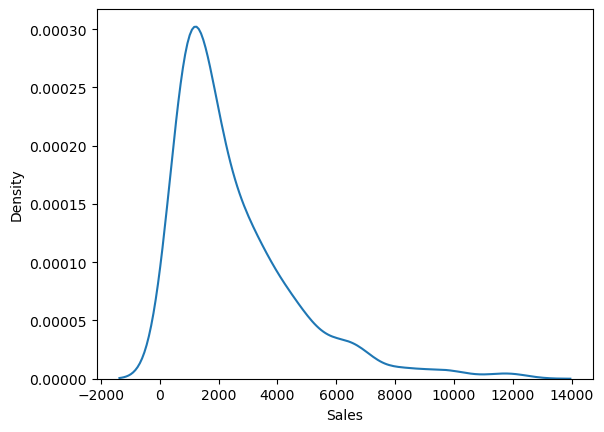

In [28]:
sns.kdeplot(data=y_train)
y_train.skew()

0.9550999778323014

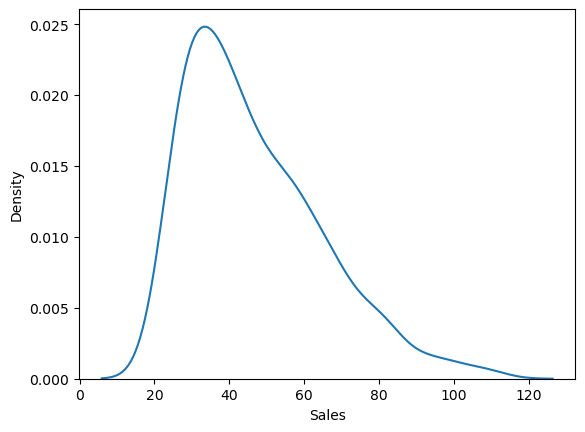

In [29]:
# SQRT transformation
y_train_sqrt = np.sqrt(y_train)
y_test_sqrt = np.sqrt(y_test)

sns.kdeplot(data=y_train_sqrt)
y_train_sqrt.skew()

0.24281770836050173

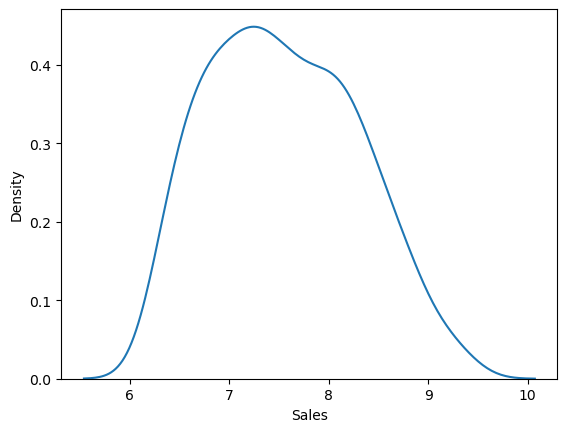

In [30]:
# LOG transformation
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

sns.kdeplot(data=y_train_log)
y_train_log.skew()

0    0.036628
dtype: float64

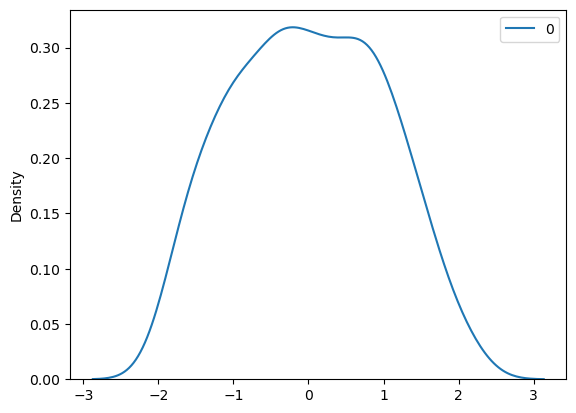

In [31]:
# BOXCOX transformation
from sklearn.preprocessing import PowerTransformer
pt_bc = PowerTransformer(method='box-cox')
# we need to use .to_frame() to convert y_train/y_val/y_test which are Pandas Series to Pandas DataFrame which is required by the PowerTransformer
y_train_bc = pt_bc.fit_transform(y_train.to_frame())
y_test_bc = pt_bc.transform(y_test.to_frame())
sns.kdeplot(data=y_train_bc)
pd.DataFrame(y_train_bc).skew()

0    0.036744
dtype: float64

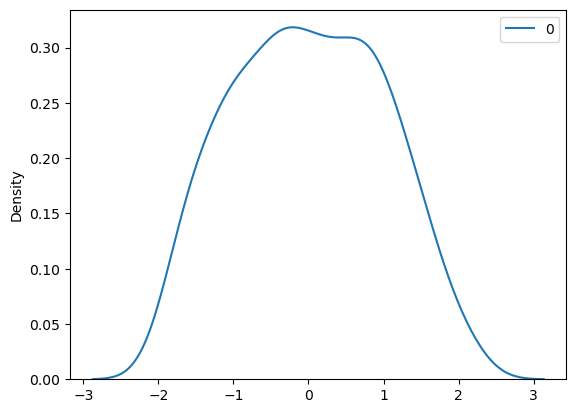

In [32]:
# Yeo Johnson transformation
pt_yj = PowerTransformer(method='yeo-johnson')
y_train_yj = pt_yj.fit_transform(y_train.to_frame())
y_test_yj = pt_yj.transform(y_test.to_frame())
sns.kdeplot(data=y_train_yj)
pd.DataFrame(y_train_yj).skew()